<a href="https://colab.research.google.com/github/EagleVector/CNN/blob/main/aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CONVOLUTION NEURAL NETWORKS(CNN) ARE WIDELY USED IN THE INDUSTRY TO CLASSIFY, DETECT AND SEGMENT IMAGES. IT USES THE PRINCIPLES OF NEURAL NETWORK TO TRAIN AND BUILD THE MODEL. IT HAS THE ABILITY TO DESIGN ITS FILTER, TRAIN ITSELF AND MODIFY IT IN EVERY EPOCH. IT FITS DEEP INTO THE TRAINING SETS. NOW WHEN IT COMES TO ROTATION OR THICKNESS OF PARTS OF IMAGE, THERE IT FAILS TO PERFORM WELL ON TEST DATA. TO OVERCOME THIS HURDLE WE USE DATA AUGMENTATION. TF HAS A BUNCH OF AUGMENTATION TOOLS BUILT TO TACKLE THE ABNORMALITIES IN IMAGE DATA. WE WILL SEE SOME OF THEM IN THIS NOTEBOOK.

WE ARE PERFORMING DATA AUGMENTATION IN THIS NOTEBOOK TO IMPROVE THE ACCURACY OF OUR CONVOLUTIONAL NEURAL NETWORK

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pwd

'/content'

In [3]:
cd /content/drive/MyDrive/Colab Notebooks/root/CNN

/content/drive/MyDrive/Colab Notebooks/root/CNN


In [4]:
pwd

'/content/drive/MyDrive/Colab Notebooks/root/CNN'

INSTALLING THE DEPENDENCIES

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

THE DATASET WE ARE USING IS FROM TENSORFLOW LIBRARY.
TF HAS ALL THE FUNCTIONALITIES TO DOWNLOAD THE DATA SAVE IT AT OUR DESIRED LOCAL SYSTEM AND PERFORM ALL THE OPERATIONS.

In [6]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

228813984/228813984 [==============================] - 2s 0us/step


In [7]:
data_dir

'./datasets/flower_photos'

PATHLIB LIBRARY FROM PYTHON IS HANDY TO USE. IT TAKES CARE OF ALL THE FILES

In [8]:
from pathlib import Path
data_dir = Path(data_dir)

In [9]:
data_dir

PosixPath('datasets/flower_photos')

In [48]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/14810868100_87eb739f26_m.jpg'),
 PosixPath('datasets/flower_photos/roses/1446090416_f0cad5fde4.jpg'),
 PosixPath('datasets/flower_photos/roses/15319767030_e6c5602a77_m.jpg'),
 PosixPath('datasets/flower_photos/roses/15032112248_30c5284e54_n.jpg'),
 PosixPath('datasets/flower_photos/roses/7211616670_2d49ecb3a5_m.jpg')]

`glob` IS USED TO FETCH ALL THE DATA FROM THE FOLDER HAVING SIMILAR EXTECTION. FILE MANAGEMENT FUNCTION

In [11]:
len(list(data_dir.glob('*/*.jpg')))

3670

In [12]:
roses = list(data_dir.glob('roses/*'))

`PIL` A PYTHON LIBRARY TO DISPLAY THE IMAGE
SIMILAR TO `plt.imshow` or `cv2.imread`

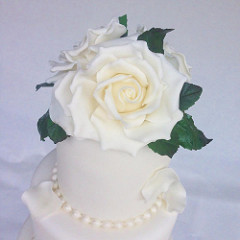

In [13]:
PIL.Image.open(str(roses[2]))

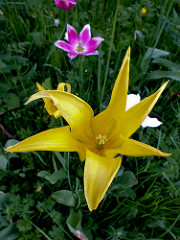

In [14]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[7]))

MAINTAINING THE DIRECTORIES OF ALL THE CLASSES SEPERATELY

In [15]:
flower_image_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

CLASS LABELING

In [17]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

DIMENSIONAL ANALYSIS

In [18]:
img = cv2.imread(str(flower_image_dict['roses'][0]))
img

array([[[255, 254, 254],
        [248, 253, 252],
        [244, 250, 249],
        ...,
        [255, 249, 254],
        [255, 248, 254],
        [255, 248, 254]],

       [[127, 174, 225],
        [134, 191, 236],
        [127, 179, 219],
        ...,
        [152, 197, 234],
        [144, 198, 233],
        [144, 198, 233]],

       [[174, 202, 232],
        [163, 200, 228],
        [167, 204, 232],
        ...,
        [170, 207, 235],
        [173, 207, 237],
        [173, 207, 237]],

       ...,

       [[252, 245, 252],
        [253, 246, 253],
        [253, 246, 253],
        ...,
        [253, 249, 255],
        [249, 245, 251],
        [249, 245, 251]],

       [[254, 247, 254],
        [254, 247, 254],
        [253, 246, 253],
        ...,
        [251, 243, 253],
        [252, 248, 254],
        [252, 248, 254]],

       [[249, 246, 255],
        [248, 245, 254],
        [248, 245, 254],
        ...,
        [254, 245, 255],
        [250, 243, 255],
        [250, 243, 255]]

In [19]:
img.shape

(240, 178, 3)

DIMENSIONAL REDUCTION AND STANDARDIZATION

In [20]:
X, y = [], []

for flower_name, images in flower_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img, (180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [21]:
X = np.array(X)
y = np.array(y)

TRAIN TEST SPLIT

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [23]:
len(X_train)

2936

In [24]:
len(X_test)

734

MIN-MAX SCALING

In [25]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

CNN MODEL TRAINING

WE USE filter count, filter size, padding and activation as HYPERPARAMS 

In [26]:
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(len(flowers_labels_dict.keys()))
])

MODEL TRAINING

In [ ]:
model.compile(optimizer='adam',
             loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics = ['accuracy'])

model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
92/92 [==============================] - 101s 1s/step - loss: 1.4566 - accuracy: 0.4026
Epoch 2/10
92/92 [==============================] - 92s 1s/step - loss: 1.0319 - accuracy: 0.5909
Epoch 3/10
92/92 [==============================] - 91s 989ms/step - loss: 0.8288 - accuracy: 0.6897
Epoch 4/10
92/92 [==============================] - 95s 1s/step - loss: 0.6120 - accuracy: 0.7810
Epoch 5/10
92/92 [==============================] - 90s 979ms/step - loss: 0.4370 - accuracy: 0.8460
Epoch 6/10
92/92 [==============================] - 91s 990ms/step - loss: 0.2754 - accuracy: 0.9128
Epoch 7/10
92/92 [==============================] - 96s 1s/step - loss: 0.1667 - accuracy: 0.9503
Epoch 8/10
86/92 [===========================>..] - ETA: 6s - loss: 0.0750 - accuracy: 0.9775

EVALUATION

In [28]:
model.evaluate(X_test_scaled, y_test)

23/23 [==============================] - 7s 299ms/step - loss: 1.8357 - accuracy: 0.6376


[1.8357253074645996, 0.6376021504402161]

THE MODEL IS OVER FITTING. IT IS NOT PERFORMING WELL ON TESTING DATA POINTS

In [29]:
pred = model.predict(X_test_scaled)
pred

23/23 [==============================] - 7s 294ms/step


array([[ 17.126047  , -17.503578  ,  -9.907378  ,  -6.289511  ,
         14.406619  ],
       [ -2.5368679 ,  -6.2942867 ,   5.1707664 ,   3.9684353 ,
         -3.7241566 ],
       [  6.016352  ,  -9.059157  ,  -9.753475  , -16.08014   ,
         14.901569  ],
       ...,
       [  0.16918972,  11.16108   ,   0.92427236,  -9.158151  ,
         -4.8447433 ],
       [  0.26256898,  -4.7718983 ,   6.56924   ,   0.06961709,
         -3.971587  ],
       [ -2.0544846 ,   1.4162066 ,   6.4314294 ,  -7.349909  ,
         -5.1066194 ]], dtype=float32)

WE HAVE USED LINEAR (DEFAULT) ACTIVATION IN OUR FINAL OUTPUT LAYER. THAT'S WHY WE ARE GETTING THIS AS OUTPUT.

SOFTMAX IS FOR NORMALIZATION WITHIN THE ARRAY

In [30]:
score = tf.nn.softmax(pred[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([9.3816334e-01, 8.5669082e-16, 1.7053418e-12, 6.3537613e-11,
       6.1836634e-02], dtype=float32)>

ARGMAX RETURNS THE INDEX OF LARGEST ENTITY WITHIN THE ARRAY.

In [31]:
np.argmax(score)

0

In [32]:
y_test[0]

0

LETS IMPROVE THE MODEL PERFORMANCE USING DATA AUGMENTATION.

`RandomZoom` IS FOR ZOOMING THE IMAGE

In [40]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomZoom(0.9)
])

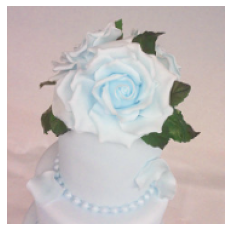

In [41]:
plt.axis('off')
plt.imshow(X[2])

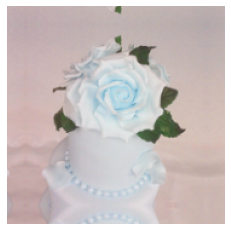

In [42]:
plt.axis('off')
plt.imshow(data_augmentation(X)[2].numpy().astype("uint8"))

CLEARLY THE PICTURE IS ZOOMED

In [45]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 3),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)


SEVERAL DATA AUGMENTATION OPERATIONS CAN BE COMBINED TOGETHER AND USED AS STACK TO IMPROVE THE SCORE.

`RandomRotation` FOR ROTATING OPERATION.

IN THE STARTING ITSELF WE APPLY DATA AUGMENTATION WHILE TRAINING CNN MODEL.

In [46]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
92/92 [==============================] - 110s 1s/step - loss: 1.3283 - accuracy: 0.4387
Epoch 2/30
92/92 [==============================] - 112s 1s/step - loss: 1.0403 - accuracy: 0.5766
Epoch 3/30
92/92 [==============================] - 107s 1s/step - loss: 0.9465 - accuracy: 0.6390
Epoch 4/30
92/92 [==============================] - 108s 1s/step - loss: 0.8921 - accuracy: 0.6465
Epoch 5/30
92/92 [==============================] - 112s 1s/step - loss: 0.8218 - accuracy: 0.6866
Epoch 6/30
92/92 [==============================] - 109s 1s/step - loss: 0.7658 - accuracy: 0.6962
Epoch 7/30
92/92 [==============================] - 112s 1s/step - loss: 0.7341 - accuracy: 0.7262
Epoch 8/30
92/92 [==============================] - 108s 1s/step - loss: 0.6989 - accuracy: 0.7319
Epoch 9/30
92/92 [==============================] - 108s 1s/step - loss: 0.6614 - accuracy: 0.7493
Epoch 10/30
92/92 [==============================] - 112s 1s/step - loss: 0.6568 - accuracy: 0.7459
Epoch 11/

In [47]:
model.evaluate(X_test_scaled,y_test)

23/23 [==============================] - 7s 308ms/step - loss: 0.8917 - accuracy: 0.7480


[0.891656756401062, 0.747956395149231]

***We can see that by using data augmentation and drop out layer the accuracy of test set predictions has increased significantly.***